In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
missing_percent=df.isnull().sum()/len(df)*100
cols_drop=missing_percent[missing_percent>60].index
df=df.drop(columns=cols_drop)


In [8]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

num_cols=num_cols.drop('survived')

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

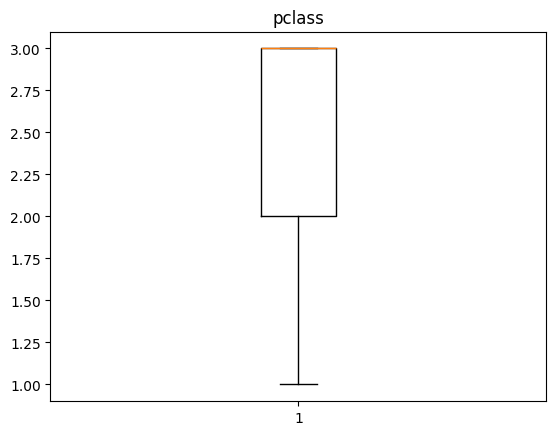

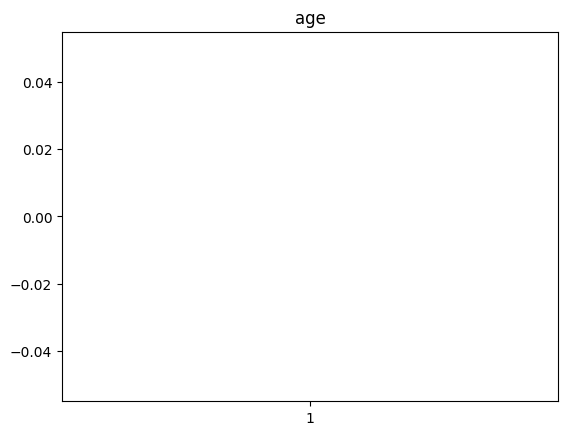

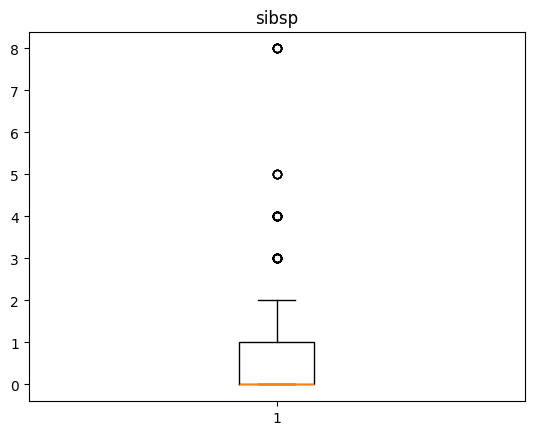

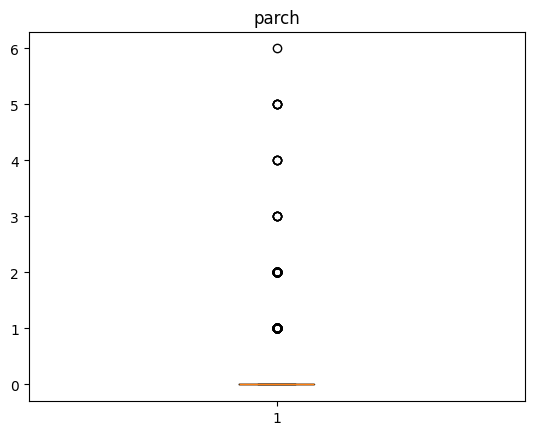

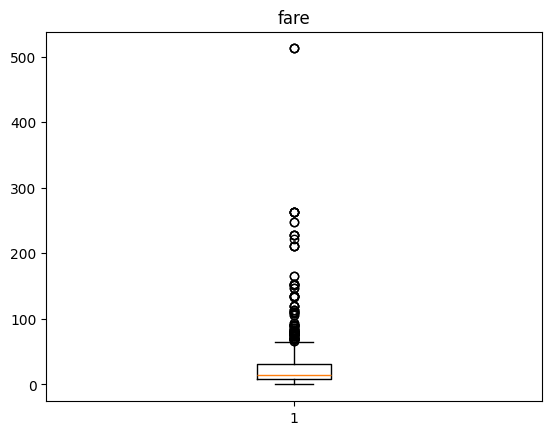

In [10]:
for col in num_cols:

    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

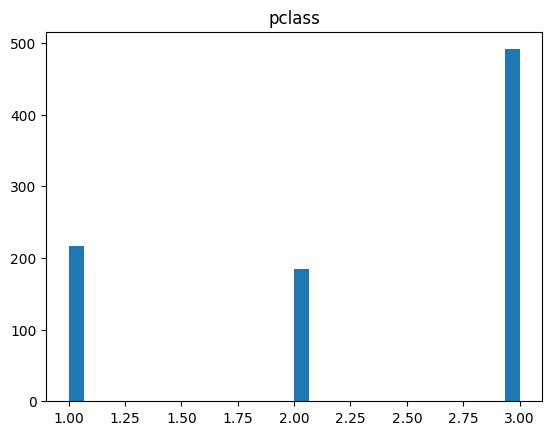

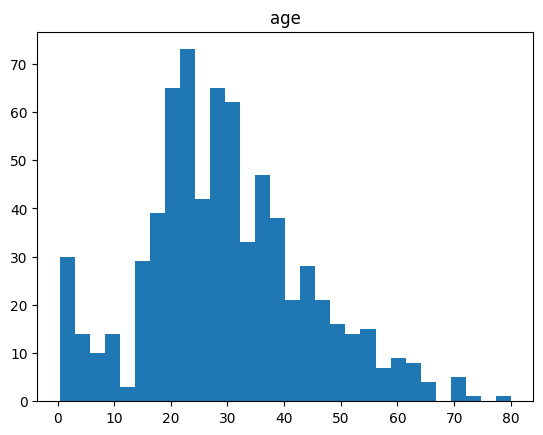

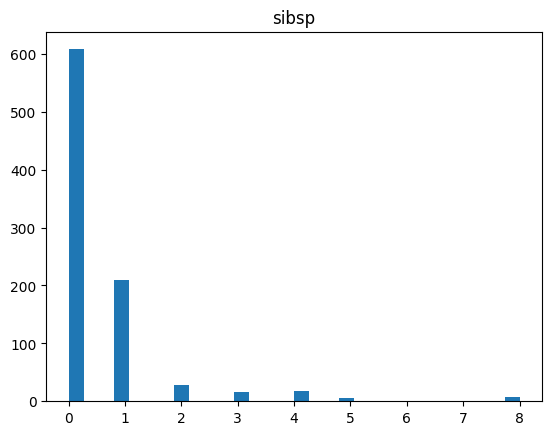

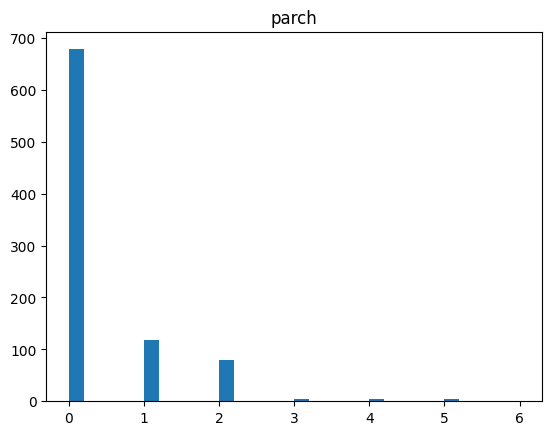

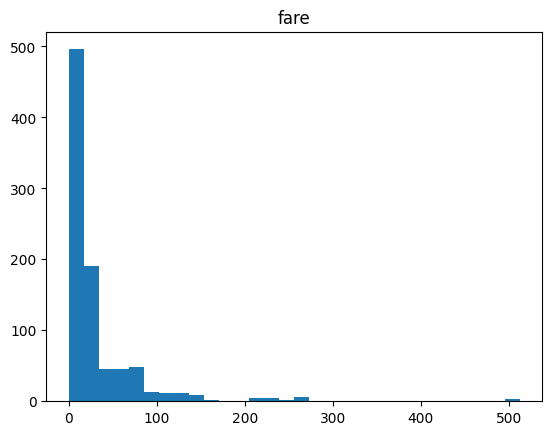

In [11]:
for col in num_cols:
    plt.hist(df[col].dropna(),bins=30)
    
    plt.title(col)
    plt.show()


In [12]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median())


In [13]:
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
#handle outliers

def handle_outliers(df,num_cols):
    for col in num_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1

        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR

        df[col]=df[col].clip(lower,upper)
    return df
handle_outliers(df,num_cols)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1.0,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1.0,0,65.6344,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1.0,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1.0,0,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

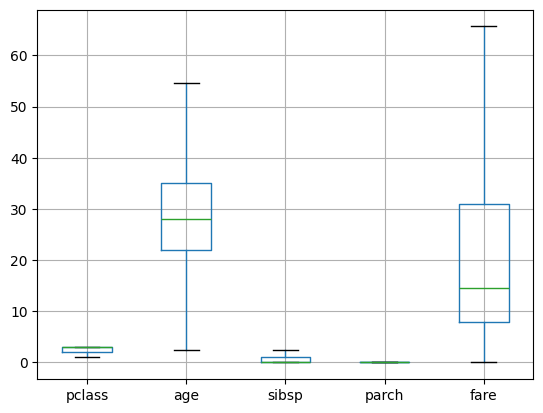

In [16]:
df[num_cols].boxplot()

In [17]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])



In [18]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,891.0,-8.772133e-17,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377
age,891.0,2.392400e-17,1.000562,-2.199638,-0.583432,-0.086138,0.494038,2.110244
sibsp,891.0,1.196200e-17,1.000562,-0.602512,-0.602512,-0.602512,0.810220,2.929318
parch,891.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fare,891.0,9.968332e-17,1.000562,-1.174727,-0.788291,-0.468615,0.339675,2.031623


In [19]:
# Feature Engneering

df['familysize']=df['sibsp']+df['parch']+1


In [20]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['class']=df['class'].map({"Third":0,"Second":1,"First":2})
df[['sex','class']].head()

,sex,class
0,0,0
1,1,2
2,1,0
3,1,2
4,0,0


In [21]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [22]:
df.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,familysize,sex_1,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,0.827377,-0.583432,0.810220,0.0,-0.820552,0,True,False,1.810220,False,False,True,True,False,False,True,False
1,1,-1.566107,0.742685,0.810220,0.0,2.031623,2,False,False,1.810220,True,False,False,False,True,False,False,True
2,1,0.827377,-0.251903,-0.602512,0.0,-0.787578,0,False,True,0.397488,True,False,True,False,True,False,True,True
3,1,-1.566107,0.494038,0.810220,0.0,1.419297,2,False,False,1.810220,True,False,True,False,True,False,True,True
4,0,0.827377,0.494038,-0.602512,0.0,-0.781471,0,True,True,0.397488,False,False,True,True,False,False,True,False


In [23]:
num_cols

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [24]:

corr = df.corr()['survived'].abs().sort_values(ascending=False)
print(corr)

select_features=corr[corr>0.5].index.tolist()
df=df[select_features]
df

survived                   1.000000
alive_yes                  1.000000
adult_male                 0.557080
who_man                    0.557080
sex_1                      0.543351
who_woman                  0.506562
class                      0.338481
pclass                     0.338481
fare                       0.317430
alone                      0.203367
embark_town_Southampton    0.149683
embarked_S                 0.149683
age                        0.060622
familysize                 0.031434
sibsp                      0.031434
embarked_Q                 0.003650
embark_town_Queenstown     0.003650
parch                           NaN
Name: survived, dtype: float64


,survived,alive_yes,adult_male,who_man,sex_1,who_woman
0,0,False,True,True,False,False
1,1,True,False,False,True,True
2,1,True,False,False,True,True
3,1,True,False,False,True,True
4,0,False,True,True,False,False
...,...,...,...,...,...,...
886,0,False,True,True,False,False
887,1,True,False,False,True,True
888,0,False,False,False,True,True
889,1,True,True,True,False,False
